In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from pathlib import Path

sns.set_theme(style="whitegrid", context="talk")

In [148]:
CURRENT_DIR = Path.cwd()
PARENT_DIR = CURRENT_DIR.parent
DATA_DIR = PARENT_DIR / "P04_MF2" / "T01_af_features"
print(CURRENT_DIR)
print(DATA_DIR)

c:\Users\admin\Coding\research\weld-ml\run1\P05_EA
c:\Users\admin\Coding\research\weld-ml\run1\P04_MF2\T01_af_features


In [149]:
filepath = os.path.join(DATA_DIR, "S01_combined_data.xlsx")
dfm = pd.read_excel(filepath)
dfm

,sample_no,location,D,Fx__dwell__ar_coefficient__coeff_0__k_10,"Fx__dwell__fft_coefficient__attr_""abs""__coeff_11","Fx__weld__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2","Fx__weld__fft_coefficient__attr_""abs""__coeff_5",Fx_location,"Fy__dwell__fft_coefficient__attr_""abs""__coeff_59","Fy__dwell__fft_coefficient__attr_""real""__coeff_71",...,"Fz__weld__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4",Fz_location,"Mz__dwell__augmented_dickey_fuller__attr_""pvalue""__autolag_""AIC""","Mz__dwell__augmented_dickey_fuller__attr_""teststat""__autolag_""AIC""",R,W,position,stress_value_5052,stress_value_6061,stress_value_center
0,1,1,10,0.007489,1.910672,0.006729,60.230153,-0.077671,0.309552,-1.545507,...,0.000409,1.244326,0.000004,-5.345424,1400,60,0.153846,28.0,51.0,12.0
1,2,1,15,0.013134,1.497020,0.008800,64.371976,-0.133276,0.436635,0.786300,...,0.000723,1.203367,0.000026,-4.966068,1400,60,0.153846,14.0,-21.0,17.0
2,3,1,20,0.009040,0.999252,0.006253,88.143882,-0.059639,1.023505,0.550453,...,0.000582,1.444542,0.008110,-3.495263,1400,60,0.153846,10.0,35.0,12.0
3,4,1,10,0.005442,0.905469,0.008120,32.083086,-0.051020,1.788437,-0.536916,...,-0.000489,1.601667,0.038451,-2.963456,1400,70,0.153846,10.0,-10.0,20.0
4,5,1,15,0.005019,8.439772,0.008490,56.841945,-0.100744,4.068030,3.543262,...,0.001675,1.095031,0.000125,-4.608391,1400,70,0.153846,6.0,41.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,50,7,15,0.004357,3.389169,0.005643,83.967538,-0.084714,1.690158,-0.026647,...,0.000259,1.905742,0.000025,-4.975763,1600,70,0.846154,4.0,-23.0,2.0
374,51,7,20,0.001533,1.694796,0.006474,8.788741,-0.094956,0.798427,-0.462940,...,0.000801,1.669120,0.000013,-5.111042,1600,70,0.846154,0.0,-1.0,2.0
375,52,7,10,0.001576,1.366042,0.005295,41.193473,-0.203323,0.326939,0.139781,...,0.000469,1.671576,0.013144,-3.340967,1600,80,0.846154,-2.0,-41.0,5.0
376,53,7,15,-0.004785,0.781104,0.003532,27.703044,-0.099644,0.497165,-0.344797,...,-0.000155,1.686495,0.351520,-1.859140,1600,80,0.846154,10.0,-90.0,1.0


location_mapped
Loc-1    14.000000
Loc-2    14.000000
Loc-3    13.000000
Loc-4    15.500000
Loc-5    11.037736
Loc-6     6.000000
Loc-7     5.000000
Name: stress_value_center, dtype: float64

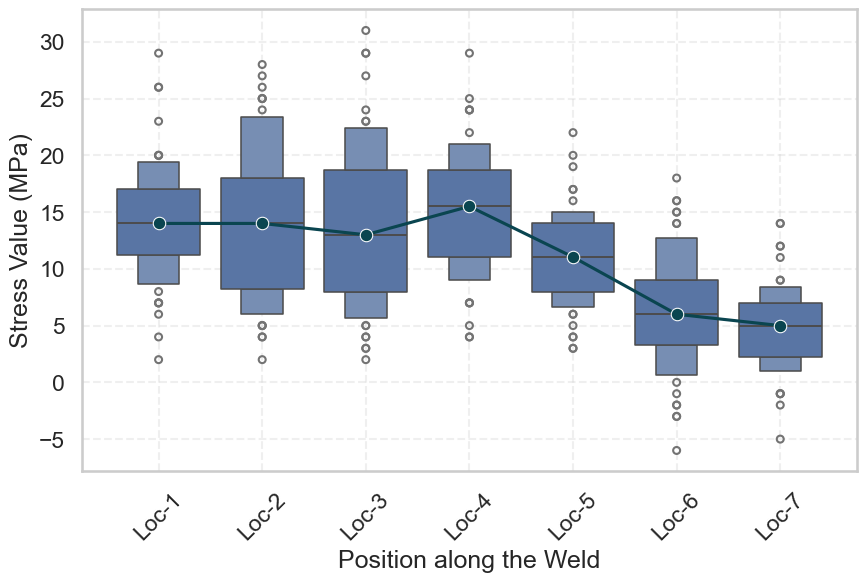

In [150]:
val_list = dfm.sort_values(by="location", ascending=True)["location"].unique()
map_dict = {v: f"Loc-{i + 1}" for i, v in enumerate(val_list)}
dfm["location_mapped"] = dfm["location"].map(map_dict)
sort = [map_dict[v] for v in val_list]
fig, ax = plt.subplots(figsize=(10, 6))
g = sns.boxenplot(
    data=dfm, x="location_mapped", y="stress_value_center", order=sort, ax=ax
)
plt.xticks(rotation=45)
plt.xlabel("Position along the Weld")
plt.ylabel("Stress Value (MPa)")

# Linear trend of mean
df_plot_grouped = (
    dfm.groupby("location_mapped")["stress_value_center"].median().reindex(sort)
)
display(df_plot_grouped)
sns.lineplot(
    x=df_plot_grouped.index, y=df_plot_grouped.values, marker="o", color="#0A4550"
)
plt.grid(True, which="major", linestyle="--", alpha=0.3)
plt.xticks(rotation=45)
plt.savefig("sigma_position.png", dpi=300, bbox_inches="tight")

R
1400    12.5
1500    10.0
1600    10.0
Name: stress_value_center, dtype: float64

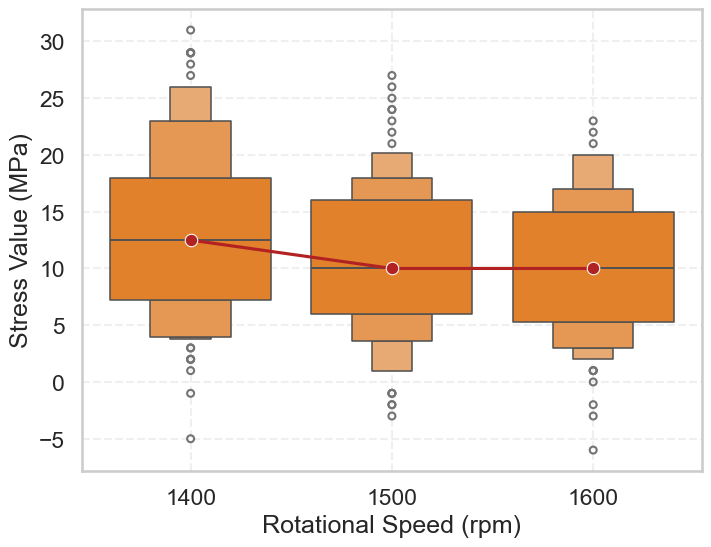

In [151]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxenplot(data=dfm, x="R", y="stress_value_center", color="tab:orange", ax=ax)
plt.xlabel("Rotational Speed (rpm)")
plt.ylabel("Stress Value (MPa)")

# Linear trend of mean
df_plot_grouped = dfm.groupby("R")["stress_value_center"].median()
display(df_plot_grouped)

x_idx = np.arange(len(df_plot_grouped.index))
sns.lineplot(
    x=x_idx, y=df_plot_grouped.values, marker="o", color="#B22222"
)
plt.grid(True, which="major", linestyle="--", alpha=0.3)
plt.xticks(rotation=0)
plt.savefig("sigma_R.png", dpi=300, bbox_inches="tight")

W
60    10.0
70    11.0
80    12.0
Name: stress_value_center, dtype: float64

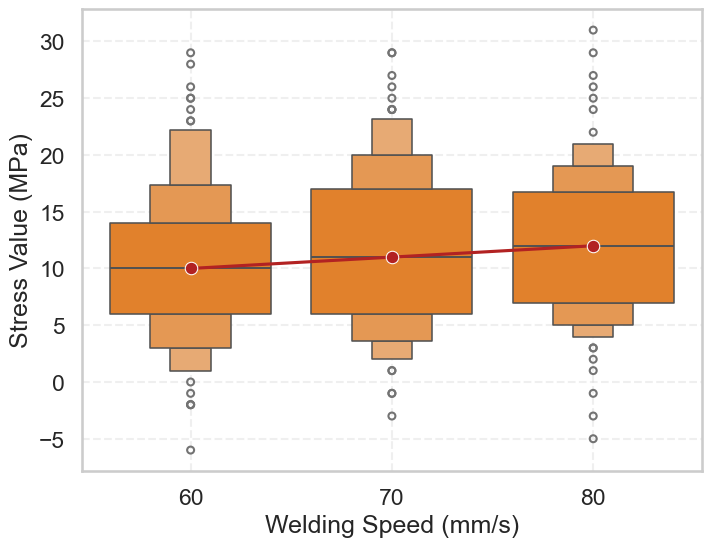

In [152]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxenplot(data=dfm, x="W", y="stress_value_center", color="tab:orange", ax=ax)
plt.xlabel("Welding Speed (mm/s)")
plt.ylabel("Stress Value (MPa)")

# Linear trend of mean
df_plot_grouped = dfm.groupby("W")["stress_value_center"].median()
display(df_plot_grouped)

x_idx = np.arange(len(df_plot_grouped.index))
sns.lineplot(
    x=x_idx, y=df_plot_grouped.values, marker="o", color="#B22222"
)
plt.grid(True, which="major", linestyle="--", alpha=0.3)
plt.xticks(rotation=0)
plt.savefig("sigma_W.png", dpi=300, bbox_inches="tight")

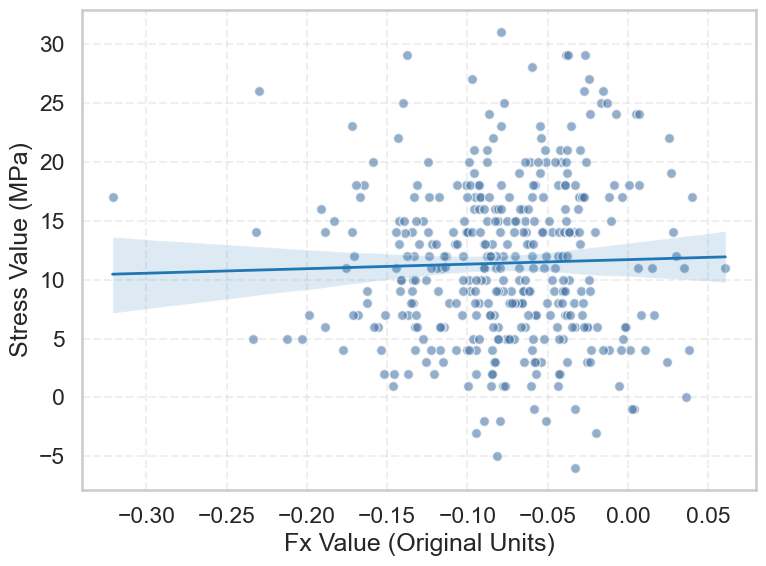

In [153]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(
    data=dfm,
    x="Fx_location",
    y="stress_value_center",
    scatter_kws={"alpha": 0.6, "s": 50, "edgecolor": "white"},
    line_kws={"color": "#1f77b4", "linewidth": 2},
    color="#4c78a8",
)
ax.set_xlabel("Fx Value (Original Units)")
ax.set_ylabel("Stress Value (MPa)")
ax.grid(True, which="major", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.savefig("sigma_fx_location.png", dpi=300, bbox_inches="tight")

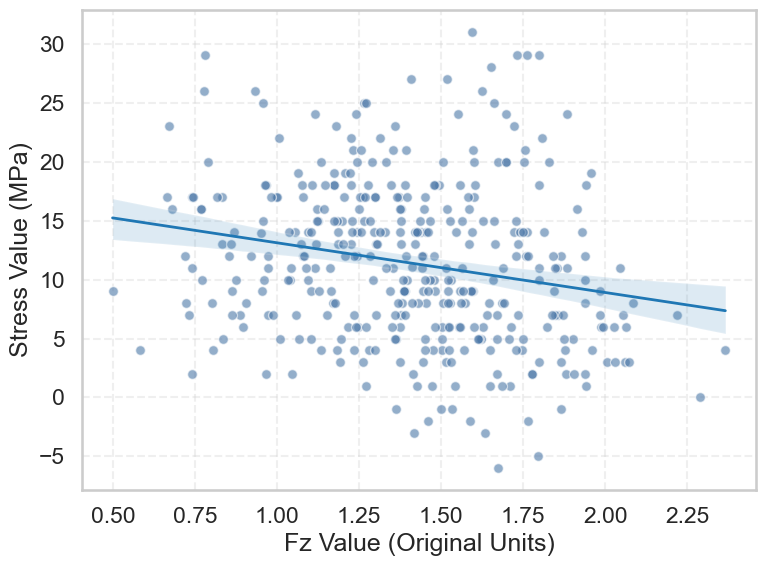

In [154]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(
    data=dfm,
    x="Fz_location",
    y="stress_value_center",
    scatter_kws={"alpha": 0.6, "s": 50, "edgecolor": "white"},
    line_kws={"color": "#1f77b4", "linewidth": 2},
    color="#4c78a8",
)
ax.set_xlabel("Fz Value (Original Units)")
ax.set_ylabel("Stress Value (MPa)")
ax.grid(True, which="major", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.savefig("sigma_fz_location.png", dpi=300, bbox_inches="tight")